# I. Introduction

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between SAT scores and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its data on high school SAT scores available online, as well as the demographics for each high school. We'll need to combine several interrelated datasets into one before we can find correlations. Below are the datasets we'll be using.
 - SAT scores by school - SAT scores for each high school in New York City
 - School attendance - Attendance information for each school in New York City
 - Class size - Information on class size for each school
 - AP test results - Advanced Placement (AP) exam results for each high school
 - Graduation outcomes - The percentage of students who graduated, and other outcome information
 - Demographics - Demographic information for each school
 - School survey - Surveys of parents, teachers, and students at each school

# II. Prepping the Data Sets

In [1]:
import pandas as pd

data_files = [
    "Graduation.csv",
    "Demographics.csv",
    "AP_Results.csv",
    "Class_Size.csv",
    "SAT_Results.csv",
    "HS_Directory.csv"
]

data = {}
for file in data_files:
    df = pd.read_csv('Schools/{0}'.format(file))
    key_name = file.replace(".csv", "")
    data[key_name] = df

### High School Directory

In [2]:
data['HS_Directory'].head(3)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...


### Graduation Outcomes

In [3]:
data['Graduation'].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%


### Class Size

In [4]:
data['Class_Size'].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN


### Demographics

In [5]:
data['Demographics'].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2


### AP Results

In [6]:
data['AP_Results'].head(3)

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24


### SAT Results

In [7]:
data['SAT_Results'].head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370


### School Survey
 
Our survey data, survey_all.txt and survey_d75.txt, are in a slightly more complex format. They are tab delimited and encoded with the rarely used Windows-1252 encoding. An encoding defines how a computer stores the contents of a file in binary. The most common encodings are UTF-8 and ASCII. Windows-1252 can cause errors read in without specifying the encoding. After the survey data is properly read in, the two files will be combined into a single dataframe.

In [8]:
all_survey = pd.read_csv("Schools/survey_all.txt", delimiter='\t', encoding='windows-1252')
d75_survey = pd.read_csv('Schools/survey_d75.txt', delimiter='\t', encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)
survey.head(3)

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0


There are over 2000 columns. We need to filter and remove the columns we don't need to better find correlations within the data. We have a data dictionary for the survey data that tells us what each column represents so we may determine which columns to use.

Per the Survey Data Dictionary in the Schools folder, we'll want to use the following columns ["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]. These columns will tell us about how parents, teachers, and students feel about school safety, academic performance, and more. 

The survey data has a dbn column, a unique identification code for each school. The column name needs to be converted to uppercase (DBN) to make it consistent with the other data sets and avoid any errors when combining them.

In [9]:
survey['DBN'] = survey['dbn']
columns = ['DBN', "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:,columns]
data['survey'] = survey
survey.head(3)

,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0


### Observations

- Each data set appears to either have a DBN column, or the information we need to create one. That means we can use a DBN column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical DBNs, then group all of their columns together in a single data set.


- Some fields look interesting for mapping, Location 1 in particular, which contains coordinates inside a larger string.


- Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate DBN values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

### Standardizing "DBN" Fields

The class size and high school directory data sets do not have a DBN column. The directory's "dbn" column needs to be renamed to "DBN" and the class size data doesn't have the column at all.

If we compare the class size and SAT results data sets, we can tell that the DBN in the SAT results data is just a combination of the "CSD" and "SCHOOL CODE" columns in the class size data. The main difference is that the DBN is padded, so that the CSD portion of it always consists of two digits. That means we'll need to add a leading 0 to the CSD if it is less than two digits long.

In [10]:
data["HS_Directory"]["DBN"] = data["HS_Directory"]["dbn"]

def padded(data):
    a = str(data)
    if len(a) < 2:
        return a.zfill(2)
    else:
        return a

data["Class_Size"]["padded_csd"] = data["Class_Size"]["CSD"].apply(padded)
data["Class_Size"]["DBN"] = data["Class_Size"]["padded_csd"] + data["Class_Size"]["SCHOOL CODE"]
data["Class_Size"].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015


### Combining SAT Scores

Combining the exam's three SAT scores into one single number will make it much easier to correlate scores with demographic factors.

A new column will be created totaling the SAT scores after the *SAT Math Avg. Score*, *SAT Critical Reading Avg. Score*, and *SAT Writing Avg. Score* columns in the *Sat_Results* data set have been converted from the object (string) data type to a numeric data type.

In [11]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

for c in cols:
    data['SAT_Results'][c] = pd.to_numeric(data['SAT_Results'][c], errors='coerce')

data['SAT_Results']['sat_score'] = data['SAT_Results'][cols[0]] + data['SAT_Results'][cols[1]] + data['SAT_Results'][cols[2]]
data['SAT_Results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

### Parsing Geographic Coordinates for Schools

We will now parse the latitude and longitude coordinates for each school to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the text field *Location 1* in the *HS_Directory* data set. The coordinates need to be extracted from the field for it contains a lot of unwanted information. 

In [12]:
import re

def latitude(loc):
    coord = re.findall("\(.+\)", loc)
    lat = coord[0].split(',')[0].replace("(","")
    return lat

def longitude(loc):
    coord = re.findall("\(.+\)", loc)
    lon = coord[0].split(',')[1].replace(")","")
    return lon

data['HS_Directory']['lat'] = data['HS_Directory']['Location 1'].apply(latitude)
data['HS_Directory']['lon'] = data['HS_Directory']['Location 1'].apply(longitude)

# Convert coordinates from strings to numbers
cols = ['lon','lat']
for c in cols:
    data['HS_Directory'][c] = pd.to_numeric(data['HS_Directory'][c], errors='coerce')

data['HS_Directory'].head(3)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...,09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...,09X327,40.842414,-73.916162


# III. Combining the Data Sets
### Condensing Class Size Data

The main data set we want to analyze, *Sat_Results*, has unique DBN values for every high school in New York City while other data sets have duplicate DBN values. A single row in the *Sat_Results* data set may match multiple rows in the *Class_Size* data set, for example. This situation will create problems, because we don't know which of the multiple entries in the *Class_Size* data set we should combine with the single matching entry in sat_results. Before merging the data sets, we'll condense the class size, graduation, and demographics data sets so that each DBN is unique.

In [13]:
data['Class_Size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


The first few rows all pertain to the same school, which is why the DBN appears more than once. Each school has multiple values for GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE and 9-12 ONLY), and CORE COURSE (MS CORE and 9-12 ONLY).

If we look at the unique values for GRADE, we get the following:

In [14]:
data["Class_Size"]["GRADE "].unique()

array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08',
       'MS Core', '09-12', '09'], dtype=object)

Because we're dealing with high schools, we're only concerned with grades 9 through 12, i.e. where the value in the GRADE column is 09-12.

If we look at the unique values for PROGRAM TYPE, we get the following:

In [15]:
data["Class_Size"]["PROGRAM TYPE"].unique()

array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)

Each school can have multiple program types. Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED.

In [16]:
class_size = data["Class_Size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size.head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292


As we saw when we displayed class_size on the last screen, DBN still isn't completely unique. This is due to the CORE COURSE (MS CORE and 9-12 ONLY) and CORE SUBJECT (MS CORE and 9-12 ONLY) columns pertaining to different kinds of classes. For example, here are the unique values for CORE SUBJECT (MS CORE and 9-12 ONLY):

In [17]:
data["Class_Size"]["CORE SUBJECT (MS CORE and 9-12 ONLY)"].unique()

array(['-', nan, 'ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)

We want our class size data to include every single class a school offers, not just a subset of them. Taking the average across all of the classes a school offers will give us unique DBN values.

In [18]:
import numpy

class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["Class_Size"] = class_size
data["Class_Size"].head(3)

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0,4.0,22.564286,18.5,26.571429,NaN
1,01M332,1,46.0,2.0,22.000000,21.0,23.500000,NaN
2,01M378,1,33.0,1.0,33.000000,33.0,33.000000,NaN


### Condensing Demographics Data

In [19]:
data['Demographics'].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2


The only column that prevents a given DBN from being unique is schoolyear. We only want to select rows where schoolyear is "20112012." This will give us the most recent year of data and match our SAT results data.

In [20]:
demographics = data["Demographics"]
demographics = demographics[demographics["schoolyear"] == 20112012]
data["Demographics"] = demographics
data["Demographics"].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3


### Condensing Graduation Data

In [21]:
data["Graduation"].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%


The Demographic and Cohort columns prevent DBN from being unique. A Cohort refers to the year the data represents and the Demographic refers to a specific demographic group. We want data from the most recent Cohort available, which is 2006 and data from the full cohort, which is labeled "Total Cohort."

In [22]:
graduation = data["Graduation"]
graduation = graduation[graduation["Cohort"] == "2006"]
graduation = graduation[graduation["Demographic"] == "Total Cohort"]
data["Graduation"] = graduation
data["Graduation"].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%


### Converting AP Test Scores

In [23]:
data['AP_Results'].head(3)

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24


AP exams have a 1 to 5 scale; 3 or higher is a passing score. AP exams are more common in academically challenging institutions than in schools that lack funding or academic rigor.

To find out whether AP exam scores are correlated with SAT scores across high schools, we need to convert the AP exam scores in the *AP_Results* data set from string to to numeric values.

Three columns need to be converted:
- AP Test Takers
- Total Exams Taken
- Number of Exams with scores 3 4 or 5

In [24]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for i in cols:
    data["AP_Results"][i] = pd.to_numeric(data["AP_Results"][i], errors="coerce")

data["AP_Results"].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

### Merging the Data Sets

The DBN column will be used to identify matching rows across data sets. There may be DBN values that exist in one data set, but not in another. This is partly because the data is from different years. Each data set also has inconsistencies in terms of how it was gathered. Human error may also play a role. Therefore, we may not find matches for the DBN values in *Sat_Results* in all of the other data sets, and other data sets may have DBN values that don't exist in *Sat_Results*. 

Both the AP results and graduation data sets have many missing DBN values, so we'll use a "left" join when we merge the SAT results data set with them. Because we're using a "left" join, our final dataframe will have all of the same DBN values as the original *SAT_Results* dataframe.

In [25]:
combined = data["SAT_Results"]
combined = combined.merge(data["AP_Results"], how='left', on='DBN')
combined = combined.merge(data["Graduation"], how='left', on='DBN')
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%


In [26]:
combined.shape

(479, 33)

Our new *combined* dataframe has a total of 479 rows and 33 columns.

Now we merge *Class_Size, Demographics, survey*, and *HS_Directory* into *combined*. Because these files contain information that's more valuable to our analysis and also have fewer missing DBN values, we'll use the "inner" join type.

In [27]:
datasets = ["Class_Size", "Demographics", "survey", "HS_Directory"]

for i in datasets:
    combined = combined.merge(data[i], how='inner', on='DBN')
    
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


In [28]:
combined.shape

(363, 165)

Our final *combined* dataframe has a total of 363 rows and 165 columns, 116 fewer rows than in *SAT_Results*. This is because pandas couldn't find the DBN values that existed in *SAT_Results* in the other data sets. While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which DBNs are missing.

There are now many columns with null (NaN) values. This is because we chose to do "left" joins, where some columns may not have had data. The data set also had some missing values to begin with. If we hadn't performed a "left" join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set. 

We'll fill in the missing values with the means of their respective columns to avoid disrupting our analyses. If a column consists entirely of null or NaN values, pandas won't be able to fill in the missing values because there won't be a mean. Any remaining NaN or null values will be filled in with the value 0.

In [29]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


We now have a clean data set on which we can base our analysis. Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the DBN. We can apply a function over the DBN column of combined that pulls out the first two letters.

In [30]:
def district(DBN):
    return DBN[0:2]

combined["school_dist"] = combined["DBN"].apply(district)
combined["school_dist"].head(3)

0    01
1    01
2    01
Name: school_dist, dtype: object

# III. Analyzing and Visualizing the Data
### Finding Correlations

Because we are interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women.

We will be using the *pandas.DataFrame.corr()* method, which will return an r value to find correlations between columns. An r value falls between -1 and 1. The closer to 1 the r value is, the stronger the positive correlation. The closer to -1 the r value is, the stronger the negative correlation. The closer to 0, the weaker the correlation. Typically, r values above .25 or below -.25 are enough to qualify a correlation as interesting.

In [31]:
correlations = combined.corr()
correlations = correlations["sat_score"]
correlations

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

In [32]:
correlations["white_per"]

0.62071776385268018

Some observations:
- *total_enrollment* has a strong positive correlation with sat_score. Surprisingly, larger schools tend to do better on the SAT. Other columns that are proxies for enrollment correlate similarly. These include *total_students, N_s, N_p, N_t* (number of student, parent and teacher respondents), *AP Test Takers, Total Exams Taken*, and *NUMBER OF SECTIONS*.
- Both the percentage of females (*female_per*) and number of females (*female_num*) at a school correlate positively with SAT score, whereas the percentage of males (*male_per*) and the number of males (*male_num*) correlate negatively. This could indicate that women do better on the SAT than men.
- Teacher and student ratings of school safety (*saf_t_11*, and *saf_s_11*) correlate with sat_score.
- Student ratings of school academic standards (*aca_s_11*) correlate with sat_score, but this does not hold for ratings from teachers and parents (*aca_p_11* and *aca_t_11*).
- There is significant racial inequality in SAT scores (*white_per, asian_per, black_per, hispanic_per*).
- The percentage of English language learners at the school (*ell_percent*) has a strong negative correlation with SAT scores.

Because enrollment seems to have such a strong correlation, let's make a scatterplot of *total_enrollment* vs *sat_score*. Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.

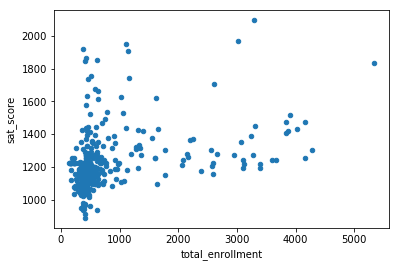

In [33]:
import matplotlib.pyplot as plt
combined.plot.scatter(x="total_enrollment", y="sat_score")
plt.show()

It doesn't appear that there's an extremely strong correlation between *sat_score* and *total_enrollment*. If there was a very strong correlation, we'd expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in three different directions.

However, there's an interesting cluster of points at the bottom left where *sat_score* and *total_enrollment* are both low. This cluster may be what's making the r value so high. It's worth extracting the names of the schools in this cluster so we can research them further.

In [34]:
low_enrollment = combined[combined["total_enrollment"] < 1000]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
low_enrollment["School Name"]

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

In [35]:
low_enrollment["ell_percent"]

91     90.1
125    86.6
126    87.1
139    88.7
141    79.9
176    92.9
179    86.4
188    83.1
225    91.0
237    30.4
253    94.6
286    91.3
Name: ell_percent, dtype: float64

Most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners. This indicates that it's actually *ell_percent* that correlates strongly with *sat_score*, rather than *total_enrollment*.

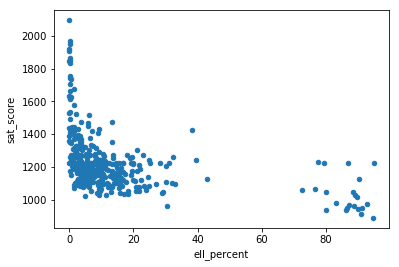

In [36]:
combined.plot.scatter(x="ell_percent", y="sat_score")
plt.show()

In [37]:
low_ell = combined[combined["ell_percent"] > 60]
low_enrollment = low_enrollment[low_enrollment["sat_score"] < 1000]
low_enrollment["School Name"]

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

It looks like *ell_percent* correlates with *sat_score* more strongly, because the scatterplot is more linear. The cluster of schools with high *ell_percent* values and low *sat_score* values represents the same group of international high schools we investigated earlier.

We will map out *ell_percent* by school district to further analyze its relationship *sat_score*. We will use the schools' coordinates stored in the *lat* and *lon* columns to plot the schools on a map of New York City.

### Mapping the Data and Plotting Out Statistics

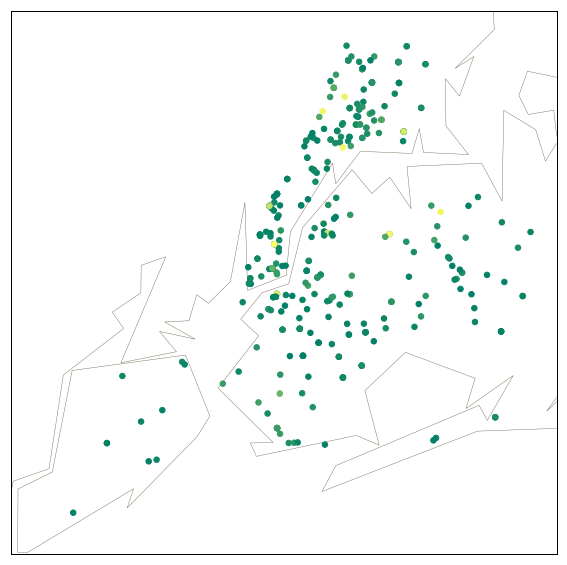

In [38]:
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(
    projection='merc',
    llcrnrlat=40.496044,
    urcrnrlat=40.915256,
    llcrnrlon=-74.255735,
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#ffffff')
m.drawcoastlines(color='#6D5F47', linewidth=.4)

longitudes = combined["lon"].tolist()
latitudes = combined["lat"].tolist()
m.scatter(longitudes, latitudes, s=30, zorder=2, latlon=True, c=combined["ell_percent"], cmap="summer")
plt.show()

It looks like uptown Manhattan and parts of Queens have a higher *ell_percent*. Due to the number of schools, it is hard to interpret the map. For a better understanding of the data, we will plot *ell_percent* district-by-district instead of school-by-school.

In [39]:
districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)

districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,...,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,...,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,...,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,...,0.0,0.0,0.0,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,...,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251


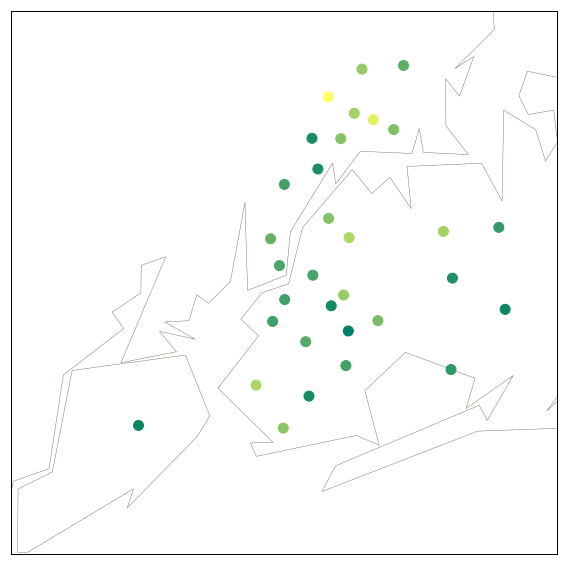

In [40]:
from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(
    projection='merc',
    llcrnrlat=40.496044,
    urcrnrlat=40.915256,
    llcrnrlon=-74.255735,
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#ffffff')
m.drawcoastlines(color='#6D5F47', linewidth=.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=100, zorder=2, latlon=True, c=districts["ell_percent"], cmap="summer")
plt.show()

Lorem ipsum dolor sit amet, ut ius atqui congue gloriatur. An decore postea repudiandae sea, usu sale veniam id, ut simul dicunt ornatus duo. Ut probo iudicabit mel, ut mollis dissentias complectitur ius. Id fierent elaboraret eos, vocibus gubergren theophrastus eam cu. Mea cu error denique, facilis necessitatibus ad eum, eum cu cibo scaevola consectetuer. Ea case alienum omittantur vix, dictas numquam delicata qui an.